## Project Overview
 
*Project goal*: predict the median value of owner-occupied homes based on several features such as the per capita crime rate, proportion of non-retail business, average number of rooms per dwelling and so on. 

This particular dataset is a copy of UCI ML housing dataset. https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

*Tools and Modules used*:
- Python
- Pandas
- Numpy
- Matplotlib
- Sklearn
- Jupyter Notebook
 
*Data (source)*: Scikit-learn library
            
*Keywords*: linear regression, ridge regression, lasso regression, feature selection. 

## Exploratory Data Analysis

In [1]:
# Import necessary modules and load the data
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Load the data
boston = load_boston()

In [2]:
# Print data set keys
print('Data set properties: {}'.format(boston.keys()))

Data set properties: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print('Feature names:{}'.format(boston.feature_names))

Feature names:['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print('Shape of feature array: {}'.format(boston.data.shape))
print('Shape of target array: {}'.format(boston.target.shape))

Shape of feature array: (506, 13)
Shape of target array: (506,)


In [5]:
# Create feature and target arrays
X, y = boston.data, boston.target

In [6]:
# Turn the target array into the desired shape
y = y.reshape(-1,1)                
print('Shape of modified target array: {}'.format(y.shape))

Shape of modified target array: (506, 1)


##### Analysing the relationship between value of  house and certain features

In [7]:
# Select individual features
X_rooms = X[:, 5]
X_age = X[:, 6]
X_tax = X[:, 9]
X_crime = X[:, 1]

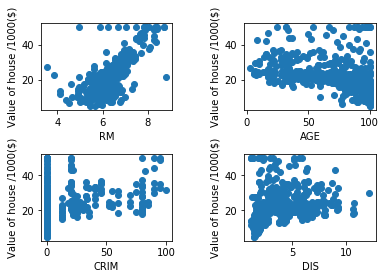

In [8]:
# Plot house values as a function of average number of rooms per dwelling (RM), proportion of owner-occupied units built prior to 1940(Age),
# per capita crime rate by town (CRIM) and weighted distances to five Boston employment centres (DIS)

plt.subplot(2, 2, 1)
plt.scatter(X_rooms, y)
plt.xlabel('RM')
plt.ylabel('Value of house /1000($)')

plt.subplot(2, 2, 2)
plt.scatter(X_age, y)
plt.xlabel('AGE')
plt.ylabel('Value of house /1000($)')

plt.subplot(2, 2, 3)
plt.scatter(X_crime, y)
plt.xlabel('CRIM')
plt.ylabel('Value of house /1000($)')

plt.subplot(2, 2, 4)
plt.scatter(X[:, 7], y)
plt.xlabel('DIS')
plt.ylabel('Value of house /1000($)')

plt.subplots_adjust(wspace=0.55, hspace=0.50)

plt.show()

## Model Building

### Model 1 - Linear Regression (without regularization)

In [9]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Instantiate the regressor: reg
reg = LinearRegression()

# Fit the regressor to the training set
reg.fit(X_train, y_train)

# Predict on the test set
y_pred = reg.predict(X_test)

##### Measuring the performance of the linear regresion model (without regularization)

In [10]:
print('R squared: {}'.format(reg.score(X_test, y_test)))

R squared: 0.711226005748496


### Model 2 - Ridge Regression 

In [11]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Instantiate the regressor
ridge = Ridge(alpha = 0.1, normalize = True)

# Train the model
ridge.fit(X_train, y_train)

# Predict on the testing set
ridge_pred = ridge.predict(X_test) 

##### Measuring the performance of the ridge regresion model

In [12]:
print('R squared:{}'.format(ridge.score(X_test, y_test)))

R squared:0.6996938275127313


### Model 3 - Lasso Regression 

In [13]:
# Import necessary modules
from sklearn.linear_model import Lasso

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Instantiate the regressor
lasso = Lasso(alpha = 0.1, normalize = True)  

# Fit the data
lasso.fit(X_train, y_train)

# Predict on the testing set
lasso_pred = ridge.predict(X_test) 

##### Measuring the performance of the lasso regresion model

In [14]:
print('R squared:{}'.format(lasso.score(X_test, y_test)))

R squared:0.5950229535328551


#### Using lasso regression for feature selection

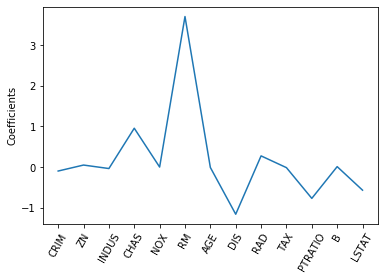

In [15]:
# Import necessary module
import matplotlib.pyplot as plt   

# Store the feature names in the variable: names
names = boston.feature_names

# Instantiate the regressor: lasso 
lasso = Lasso(alpha = 0.1)

# Fit the regressor to the data and extract the coefficient attribute
lasso_coef = lasso.fit(X, y).coef_

# plot feature selection
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel('Coefficients')
plt.show()

From the plot we see that the most important feature/predictor for our target variable (i.e. median value of owner-occupied homes/1000($)) is average number of rooms per dwelling (RM).